<h1>Lesson 3. Classification: Credit worthiness from German bank</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [86]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import datasets

# loading the training and test dataset
credit_train = pd.read_csv('credit_train.csv')
credit_test = pd.read_csv('credit_test.csv')

credit_train.head()


,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


<h3>Q.0. Write code to display the count of null values in each column<h3>

In [87]:
# Command:

credit_train.isna().sum()
credit_test.isna().sum()

# One sentance summary:
# There are no null values in any columns in either dataset, if it did we would cause later methods as we've seen in the past.

Class                             0
Duration                          0
Amount                            0
InstallmentRatePercentage         0
ResidenceDuration                 0
Age                               0
NumberExistingCredits             0
NumberPeopleMaintenance           0
Telephone                         0
ForeignWorker                     0
CheckingAccountStatus.lt.0        0
CheckingAccountStatus.0.to.200    0
CheckingAccountStatus.gt.200      0
CreditHistory.ThisBank.AllPaid    0
CreditHistory.PaidDuly            0
CreditHistory.Delay               0
CreditHistory.Critical            0
dtype: int64

<h3>Q.1. How does the distribution of credit amount look like? (Use a histogram plot to answer this question)</h3>

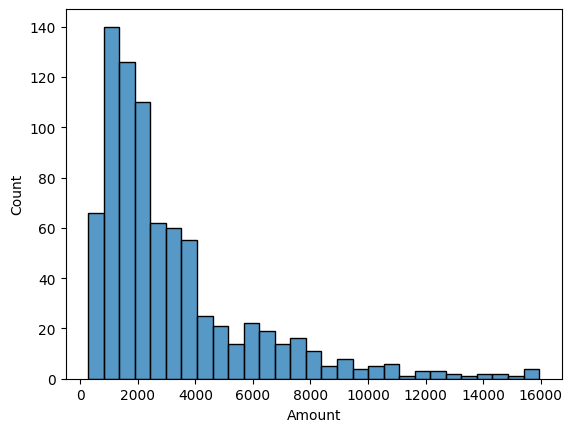

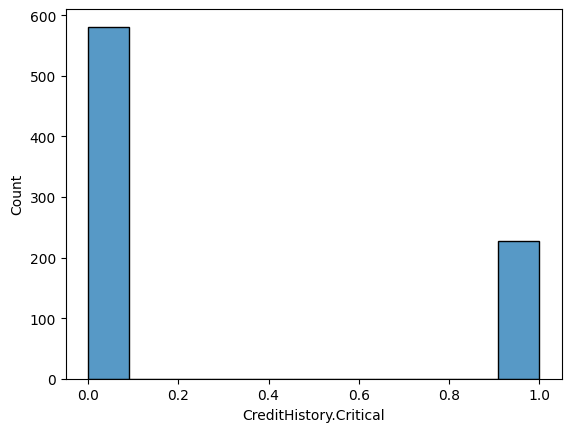

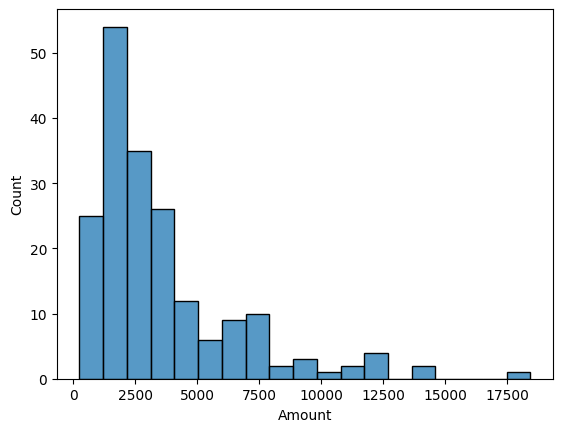

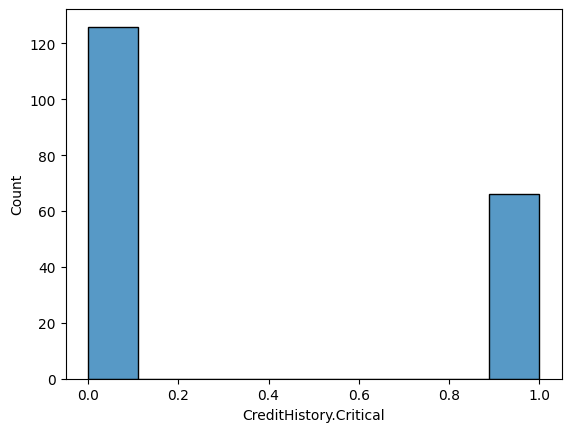

In [88]:
# Put the command (or commands) here that would give an answer to the above question.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# credit_train['Amount'].plot(kind='kde') # Rawer distribution curve
sns.histplot(credit_train, x='Amount')
plt.show()
# 200 people have critical credit history
sns.histplot(credit_train, x='CreditHistory.Critical')
plt.show()

# Test data
sns.histplot(credit_test, x='Amount')
plt.show()
sns.histplot(credit_test, x='CreditHistory.Critical')
plt.show()

<h3>Q.2. Can you generate a plot that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3>

(array(['Bad', 'Good'], dtype=object), array([246, 562]))

(array([0, 1]), array([581, 227]))

<Axes: xlabel='CreditHistory.Critical', ylabel='count'>

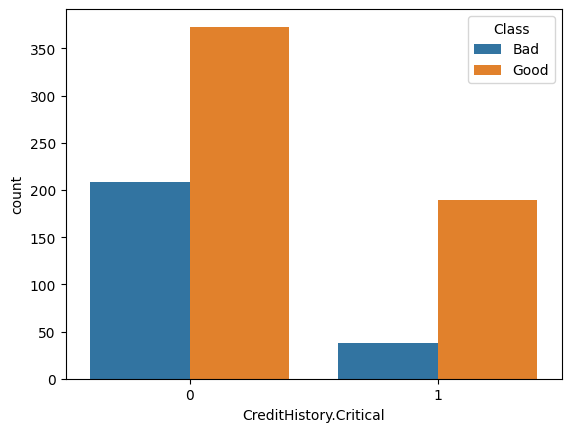

In [89]:
import seaborn as sns
import numpy as np
# Command:
display(np.unique(credit_train['Class'], return_counts=True))
display(np.unique(credit_train['CreditHistory.Critical'], return_counts=True))

sns.countplot(data=credit_train, x ='CreditHistory.Critical', hue ='Class')

# One sentence summary:
# A count plot is definitely a better representation here than what I had used previously. The person with critical credit history is more credit worthy by a significant margin (~25/30 bad : 200 good) vs. no critical credit history (200 bad : ~375 good).

<h3>Q.3. Binarize the y output for e.g. 0 = 'bad' credit; 1 = 'good' credit. </h3>

In [90]:
# Newly adding a column with the corrected good/bad values.
credit_train['y_class'] = credit_train['Class'].replace({'Bad': 0, 'Good': 1})
credit_train.head()
credit_test['y_class'] = credit_test['Class'].replace({'Bad': 0, 'Good': 1})
#credit_test.head()

credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical,y_class
0,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1,1
1,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0,0
2,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1,1
3,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0,1
4,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0,1


<h3>Q.4. Generate a logistic regression model that uses the one predictor CreditHistory.Critical. Provide a summary of the model. </h3>

In [91]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

#X = credit_train['CreditHistory.Critical']
#y = credit_train.y_class
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#X_train = np.reshape(X_train, (-1,1))
#X_test = np.reshape(X_test, (-1,1))

predictors  = ['CreditHistory.Critical'] # we only have one predictor...extreme imbalance?
X_train = np.array(credit_train[predictors])
y_train = np.array(credit_train['y_class'])
X_test = np.array(credit_test[predictors])
y_test = np.array(credit_test['y_class'])

# LOGREG
logregr       = LogisticRegression()
model_logregr = logregr.fit(X_train, y_train)

<h3>Q.5. Using the developed model, predict the values in credit_test and use it to output a confusion matrix.</h3>

In [92]:
# Make a prediction(s) from the test data
y_pred_logregr = model_logregr.predict(X_test)

# Measure performance of the model with a confusion matrix
cnf_matrix_logregr = confusion_matrix(y_test, y_pred_logregr)
print(cnf_matrix_logregr)
print(classifier_stats(cnf_matrix_logregr))

[[  0  54]
 [  0 138]]
prior_error_rate                         0.29703
total_error_rate                         0.29703
true_positive_rate (sensitivity)         1.00000
false_negative_rate                      0.00000
false_positive_rate                      1.00000
true_negative_rate (specificity)         0.00000
positive_predictive_value (precision)    0.71875
negative_predictive_value                    NaN
dtype: float64


<ipython-input-74-761f587b4e62>:65: RuntimeWarning: invalid value encountered in scalar divide
  return confusion_mtx[0, 0] / np.sum(confusion_mtx[:, 0])


<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [93]:
# Command that outputs accuracy
score = accuracy_score(y_test, y_pred_logregr)
print(score)

0.71875


<h3>Q.7. Generate the ROC curve.</h3>

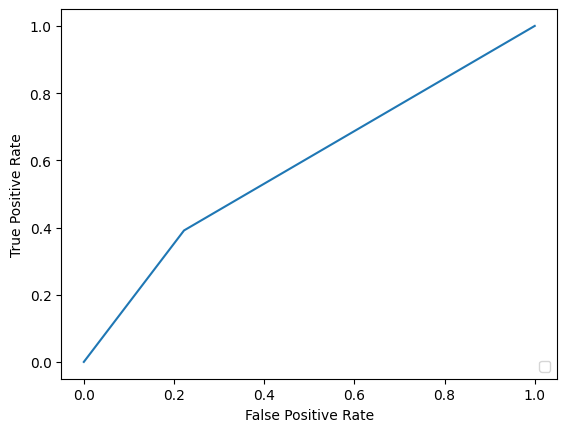

In [94]:
y_pred_proba = logregr.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

<h3>Q.8. What is the ROC AUC of the model on the test data?</h3>

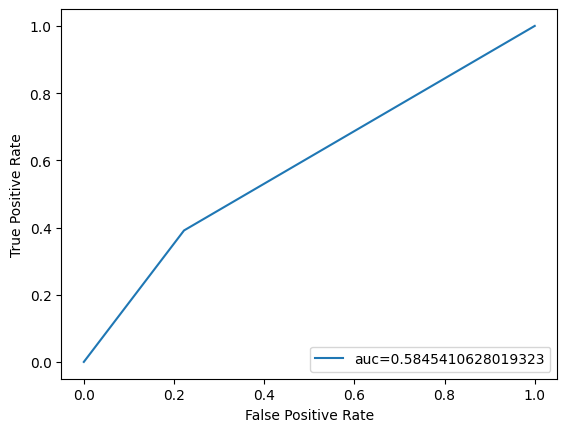

In [95]:
# Command(s):
# Create the ROC curve and give the axis some labels here
y_pred_proba = logregr.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

<h3>Q.9. Calculate LDA model on credit_train.</h3>

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

lda         = LinearDiscriminantAnalysis()
model_lda   = lda.fit(X_train, y_train)
y_pred_lda = model_lda.predict(X_test)

<h3>Q.10. What is the accuracy of the new model?</h3>

In [97]:
# Command that outputs accuracy
score_lda = accuracy_score(y_test, y_pred_lda)
print(score_lda)

0.71875


<h3>Q.11. Create a new text cell in your Notebook: Complete a 50-100 word summary
    (or short description of your thinking in applying this week's learning to the solution)
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

# Q.11

1. My experience with this model was virtually none prior to this Lecture.
2. Obstacles - I had a few. The biggest one being with a single feature that is a binary 0 or 1 (CreditHistory.Critical) we are trying to predict the class of credit holder as 'good' or 'bad' (also converted to '1' and '0' respectively). This makes sense from an analysis perspective, but my results were a bit inconclusive at first as I was not able to generate a ROC Curve at all! Instead my confusion matrix showed *only* false positives and false negatives.  This was quite odd so I figured I must have done something wrong. I wanted to have a larger set of predictors and spent a lot of time trying to get that to work to no avail.
* Addendum, after reworking the lab I received similar results between logregression and LDA, but I actually received a ROC curve after modifying some values. I think the imbalanced classes (covered in lesson 4) could lead to so many positives.
3. Connecting with real-world - we have many examples of classification. A funny one would be 'Given geolocational data (x, y coordinates) and animal sightings, if an animal is furry (bool), has 4 legs (bool), and makes growling sounds (bool), is it of class dog, wolf, coyote, bear, mountain liom/cougar, etc.'. You could also predict other things such as the class of plant, types of products that a given store in a store that is not standardized would have, types of cybersecurity threats (I used this in my discussion), and others.
4. What steps are missing? Better ways to clean the data, or maybe a reminder for some of the methods that we already learned (it's tough to remember everything!). We do a good job of checking null values (NaN) and other cleanups like the strings 'good' and 'bad' in this assignment. There's always some other data cleanup like transforming single array matrices to fit the model, and intuition involved around data exploration that could be useful to do for a more in-depth analysis if given time. I think the ugliness of some of the data and models is a part of the process, since that's where data modeling and needing to clean it for visualization before presenting to the public comes in. It might be good to cover some examples to make 'prettier' datamodels, just for ease of interpretation.